In [1]:
import numpy as np

### Problem 2a

In [2]:
X = np.array([[1,1],
              [4,0],
              [0,2]])

In [3]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
print(P)

[[ 0.23809524  0.19047619  0.38095238]
 [ 0.19047619  0.95238095 -0.0952381 ]
 [ 0.38095238 -0.0952381   0.80952381]]


### Problem 3b

In [4]:
# STARTER CODE
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import colors
# load data, make sure ‘fisheriris.mat‘ is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
X = data['meas']
y_text = data['species']
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# ‘y‘ according to your (a), make sure ‘y‘ is a 1d numpy array.
# If dimensions are mismatching, you may find ‘y = y.flatten()‘ useful.
text_to_num = {
    'setosa': -1,
    'versicolor': 0,
    'virginica': 1
}
y = np.array([text_to_num[text[0][0]] for text in y_text])

# Compute the least squares weights
w = np.linalg.inv(X.T @ X) @ X.T @ y

# Compute the residuals
y_hat = X @ w
res = y - y_hat

# Make a plot
print(res @ X)

[9.20152843e-13 5.00044450e-13 3.55271368e-13 1.75415238e-13]


### Problem 3c

In [5]:
# STARTER CODE
import numpy as np
import scipy.io
# load data, make sure ‘fisheriris.mat‘ is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data['meas']
y_text = data['species']
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# ‘y‘ according to your (a), make sure ‘y‘ is a 1d numpy array.
# If dimensions are mismatching, you may find ‘y = y.flatten()‘ useful.

text_to_num = {
    'setosa': -1,
    'versicolor': 0,
    'virginica': 1
}
y = np.array([text_to_num[text[0][0]] for text in y_text])

# number of random trials
N = 10000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40
for i in np.arange(N):
    # initialize 0-length arrays for the train and holdout indices. These
    # arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)
    # There are 3 label types and 50 samples of each type
    for label_type in range(3):
        # Choose a random ordering of the 50 samples
        r = np.random.permutation(50)
        # Add the first num_train indices of the random ordering to
        # the idx_train array
        idx_train = np.concatenate((idx_train,
                                    50 * label_type + r[:num_train]))
        # Add the rest of the indices to the idx_holdout array
        idx_holdout = np.concatenate((idx_holdout,
                                      50 * label_type + r[num_train:]))
    # divide data and labels into the train and holdout sets
    Xt = X[idx_train]
    yt = y[idx_train]
    Xh = X[idx_holdout]
    yh = y[idx_holdout]

    ########################
    # YOUR CODE BELOW
    # Solve for the LS weights
    w_t = np.linalg.inv(Xt.T @ Xt) @ Xt.T @ yt

    # Make predictions using the LS weights
    y_tilde = Xh @ w_t

    # Turn the real-valued predictions into class labels
    y_hat = np.where(y_tilde > 0.5, 1,
                     np.where(y_tilde < -0.5, -1,
                              np.where((y_tilde >= -0.5) & (y_tilde <= 0.5),
                                       0,y_tilde)))

    # Compute the errors
    test_err = np.sum(np.where(y_hat != yh,1,0))
    errs[i] = test_err

avg_err = np.sum(errs) / (30 * N) * 100
print(f"Average estimate over {N} trials: {avg_err:.3f}%")

Average estimate over 10000 trials: 3.195%


### Problem 3d

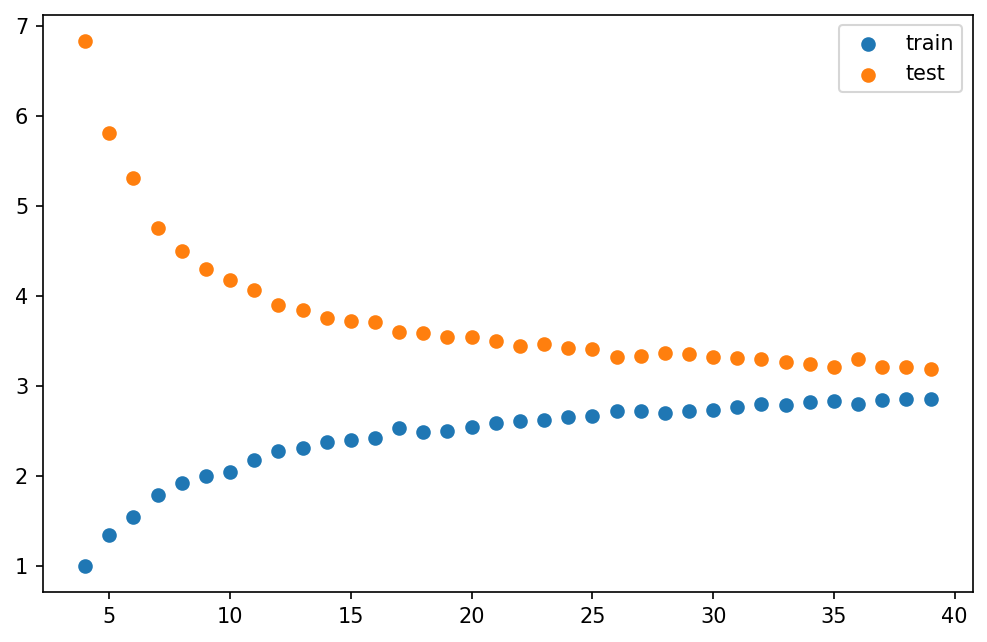

In [6]:
# STARTER CODE
import numpy as np
import scipy.io
# load data, make sure ‘fisheriris.mat‘ is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data['meas']
y_text = data['species']
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# ‘y‘ according to your (a), make sure ‘y‘ is a 1d numpy array.
# If dimensions are mismatching, you may find ‘y = y.flatten()‘ useful.

text_to_num = {
    'setosa': -1,
    'versicolor': 0,
    'virginica': 1
}
y = np.array([text_to_num[text[0][0]] for text in y_text])

# number of random trials
N = 5000
# Min / Max size of the training set
min_num_train = 4
max_num_train = 40
# Arrays to store error rates
train_errs = np.zeros((max_num_train-min_num_train, N))
test_errs = np.zeros((max_num_train-min_num_train, N))
n_train_vals = np.arange(min_num_train, max_num_train)
for j, n_train in enumerate(n_train_vals):
    for i in np.arange(N):
        # initialize 0-length arrays for the train and holdout indices.
        # These arrays will be filled in the inner loop.
        idx_train = np.zeros(0, dtype=np.intp)
        idx_holdout = np.zeros(0, dtype=np.intp)
        # There are 3 label types and 50 samples of each type
        for label_type in range(3):
            # Choose a random ordering of the 50 samples
            r = np.random.permutation(50)
            # Add the first num_train indices of the random ordering to
            # the idx_train array
            idx_train = np.concatenate((idx_train,
                                    50 * label_type + r[:n_train]))
            # Add the rest of the indices to the idx_holdout array
            idx_holdout = np.concatenate((idx_holdout,
                                    50 * label_type + r[n_train:]))
        # divide data and labels into the train and holdout sets
        Xt = X[idx_train]
        yt = y[idx_train]
        Xh = X[idx_holdout]
        yh = y[idx_holdout]
        ########################
        # YOUR CODE BELOW

        # training
        ## weights
        w_t = np.linalg.inv(Xt.T @ Xt) @ Xt.T @ yt

        ## prediction
        y_tilde_train = Xt @ w_t
        y_hat_train = np.where(y_tilde_train > 0.5, 1,
                     np.where(y_tilde_train < -0.5, -1,
                              np.where((y_tilde_train >= -0.5) & (y_tilde_train <= 0.5),
                                       0,y_tilde_train)))

        ## error
        train_err = np.sum(np.where(y_hat_train != yt,1,0)) / yt.shape[0] * 100
        train_errs[j][i] = train_err

        # test
        ## prediction
        y_tilde_test = Xh @ w_t
        y_hat_test = np.where(y_tilde_test > 0.5, 1,
                     np.where(y_tilde_test < -0.5, -1,
                              np.where((y_tilde_test >= -0.5) & (y_tilde_test <= 0.5),
                                       0,y_tilde_test)))

        ## error
        test_err = np.sum(np.where(y_hat_test != yh,1,0)) / yh.shape[0] * 100
        test_errs[j][i] = test_err


###################
# YOUR CODE BELOW
# Make a plot of the train and test errors as a function of
# training set size

import matplotlib.pyplot as plt

plt.figure(figsize=[8,5],dpi=150)
plt.scatter(x = n_train_vals, y = np.mean(train_errs, axis = 1),
            label = 'train')
plt.scatter(x = n_train_vals, y = np.mean(test_errs, axis = 1),
            label = 'test')
plt.legend()

### Problem 3e

In [7]:
# STARTER CODE
import numpy as np
import scipy.io
# load data, make sure ‘fisheriris.mat‘ is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
# training data
X = data['meas'][:,[0,2]]
y_text = data['species']
############################
# YOUR CODE BELOW
# Process and assign numerical values to
# ‘y‘ according to your (a), make sure ‘y‘ is a 1d numpy array.
# If dimensions are mismatching, you may find ‘y = y.flatten()‘ useful.

text_to_num = {
    'setosa': -1,
    'versicolor': 0,
    'virginica': 1
}
y = np.array([text_to_num[text[0][0]] for text in y_text])

# number of random trials
N = 10_000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40
for i in np.arange(N):
    # initialize 0-length arrays for the train and holdout indices. These
    # arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)
    # There are 3 label types and 50 samples of each type
    for label_type in range(3):
        # Choose a random ordering of the 50 samples
        r = np.random.permutation(50)
        # Add the first num_train indices of the random ordering to
        # the idx_train array
        idx_train = np.concatenate((idx_train,
                                    50 * label_type + r[:num_train]))
        # Add the rest of the indices to the idx_holdout array
        idx_holdout = np.concatenate((idx_holdout,
                                      50 * label_type + r[num_train:]))
    # divide data and labels into the train and holdout sets
    Xt = X[idx_train]
    yt = y[idx_train]
    Xh = X[idx_holdout]
    yh = y[idx_holdout]

    ########################
    # YOUR CODE BELOW
    # Solve for the LS weights
    w_t = np.linalg.inv(Xt.T @ Xt) @ Xt.T @ yt

    # Make predictions using the LS weights
    y_tilde = Xh @ w_t

    # Turn the real-valued predictions into class labels
    y_hat = np.where(y_tilde > 0.5, 1,
                     np.where(y_tilde < -0.5, -1,
                              np.where((y_tilde >= -0.5) & (y_tilde <= 0.5),
                                       0,y_tilde)))

    # Compute the errors
    test_err = np.sum(np.where(y_hat != yh,1,0))
    errs[i] = test_err

avg_err = np.sum(errs) / (30 * N) * 100
print(f"Average estimate over {N} trials: {avg_err:.3f}%")

Average estimate over 10000 trials: 5.709%


### Problem 4c

In [5]:
 ### STARTER CODE
import numpy as np
import numpy.linalg as la
p = np.array(
    [[0.2, 0.4, 0. ],
    [0.4, 0.8, 0. ],
    [0. , 0. , 1. ]]
)
### YOUR CODE BELOW
a_1 = p[:, 0]
a_2 = p[:, 2]
q_1 = a_1 / la.norm(a_1)
q_2_tilde = a_2 - (q_1 @ a_2) * q_1
q_2 = q_2_tilde / la.norm(q_2_tilde)
print(q_1)
print(q_2)

[0.4472136  0.89442719 0.        ]
[0. 0. 1.]
